c:\Users\Hammadii\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.6669 - loss: 0.8346 - val_accuracy: 0.7083 - val_loss: 0.7898
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6623 - loss: 0.8045 - val_accuracy: 0.7083 - val_loss: 0.7423
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6466 - loss: 0.7394 - val_accuracy: 0.7083 - val_loss: 0.7006
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7101 - loss: 0.6565 - val_accuracy: 0.7083 - val_loss: 0.6638
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7189 - loss: 0.6294 - val_accuracy: 0.7083 - val_loss: 0.6320
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6608 - loss: 0.6615 - val_accuracy: 0.7083 - val_loss: 0.6069
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7449 - loss: 0.5452 - val_accuracy: 0.7083 - val_loss: 0.5844
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7340 - loss: 0.5245 - val_accuracy: 0.7083 - 

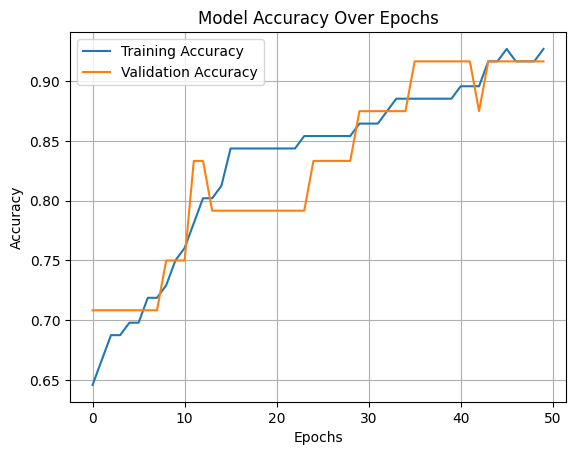

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Import and Load the Dataset
data = load_iris()
X = data.data  # shape: (150, 4)
y_raw = data.target.reshape(-1, 1)  
# 2. One-Hot Encode the Target Labels
encoder = OneHotEncoder()  # no sparse or sparse_output param
y = encoder.fit_transform(y_raw).toarray()  # convert sparse to dense array

# 3. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Build the Model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes

# 6. Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Train the Model
history = model.fit(
    X_train, y_train, epochs=50, batch_size=8, validation_split=0.2
)

# 8. Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_accuracy:.4f}')

# 9. Visualize Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
